# Sprawozdanie z MIO laboratorium 07 - Marcin Knapczyk

# Zadanie 1

Proszę pobrać plik customers_mall.csv, zawierający informacje o klientach pewnego centrum handlowego. Pierwsza kolumna przedstawia ich zarobki (w tysiącach), w drugiej zaś znajduje się punktowa ocena wydatków (od 0 do 100) każdego z klientów.  Proszę dokonać klasteryzacji zbioru z użyciem algorytmu k-means. Uzyskane wyniki należy zwizualizować, ocenić i opisać. Wskazane jest zarekomendowanie odpowiedniej ilości klastrów.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv("customers_mall.csv", delimiter=";")

data.describe()

,Annual Income,Spending Score
count,200.000000,200.000000
mean,60.560000,46.465000
std,26.264721,28.220396
min,15.000000,1.000000
25%,41.500000,21.000000
50%,61.500000,47.500000
75%,78.000000,72.000000
max,137.000000,99.000000


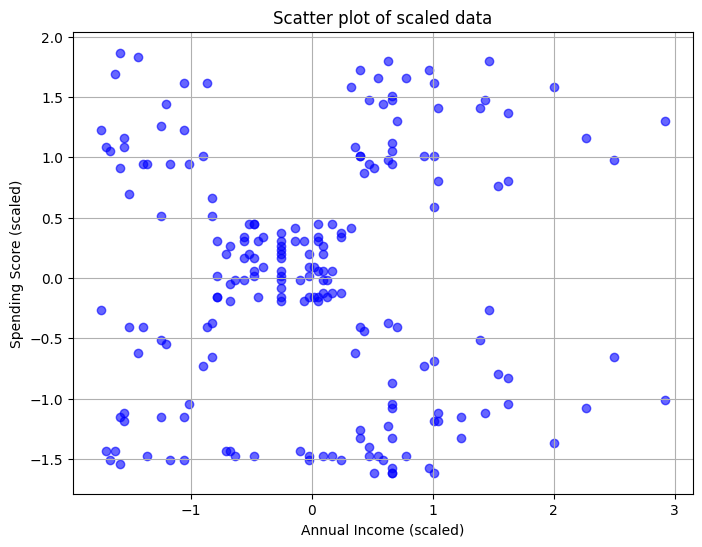

In [ ]:
features = data[["Annual Income", "Spending Score"]]

# skalowanie danych
scaler = StandardScaler()

data_scaled = scaler.fit_transform(features)
data_scaled_df = pd.DataFrame(data_scaled, columns=["Annual Income", "Spending Score"])

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled_df["Annual Income"], data_scaled_df["Spending Score"], c="blue", alpha=0.6)
plt.title("Scatter plot of scaled data")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid()
plt.show()


Wstępnie analizując wizualizację punktów danych można zauważyć "na oko" 5 formujących się klastrów.

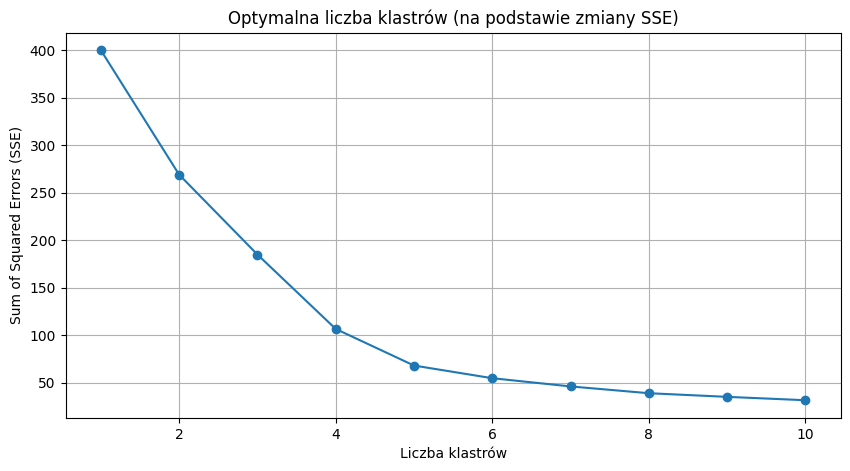

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker="o")

plt.title("Optymalna liczba klastrów (na podstawie zmiany SSE)")
plt.xlabel("Liczba klastrów")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid()
plt.show()


Korzystając z wykresu zmiany metryki SSE dla różnych ilości klastrów można typować optymalną ilość klastrów metodą tzw. "łokcia" - w miejscu, w którym wykres wypłaszcza się (spadek SSE zmniejsza się, więc większa ilość klastrów jest mniej uzasadniona).

Z powyższego wykresu można typować optymalną ilość klastrów na 4, 5 lub 6.

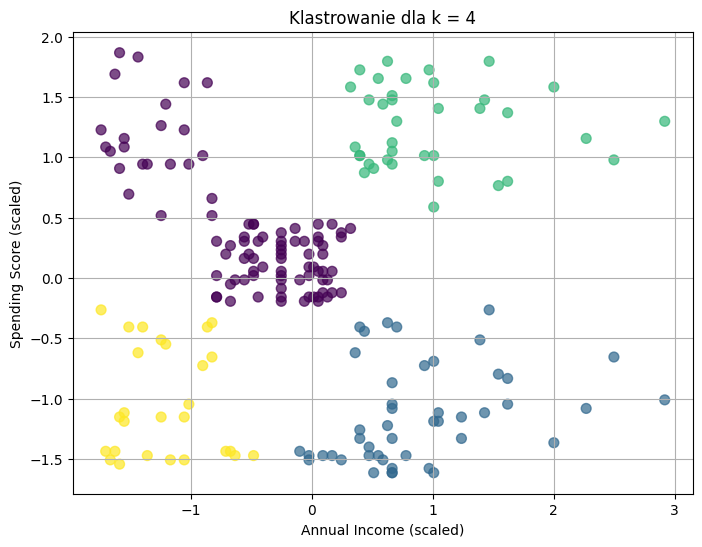

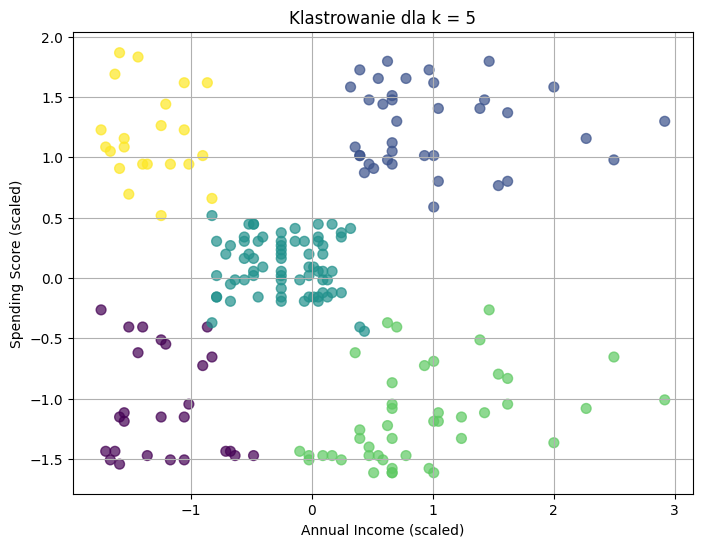

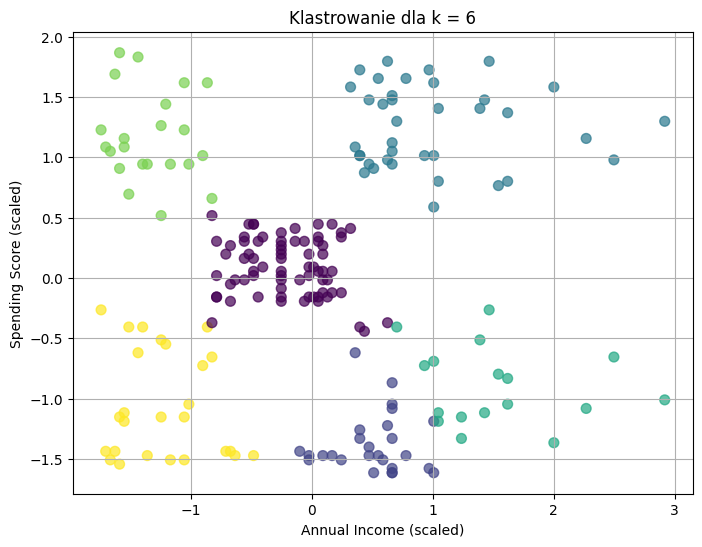

In [ ]:
# klasteryzacja i wizualizacja dla 4, 5 i 6 klastrów
for k in [4, 5, 6]:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(data_scaled_df)

    # scatter plot z klastrami
    plt.figure(figsize=(8, 6))
    plt.scatter(data_scaled_df["Annual Income"], data_scaled_df["Spending Score"],
                c=cluster_labels, cmap="viridis", s=50, alpha=0.7)
    plt.title(f"Klastrowanie dla k = {k}")
    plt.xlabel("Annual Income (scaled)")
    plt.ylabel("Spending Score (scaled)")
    plt.grid()
    plt.show()

## Wnioski
  * Metoda "łokcia" sugeruje podział na 4,5 lub 6 klastrów
  * Analizując wizualizację przydziałów punktów do klastrów można stwierdzić, że podział na 5 klastrów wydaje się najbardziej naturalny
  * W przypadku podziału na 4 klastry jeden z nich zawiera dwa skupiska punktów (fioletowy)
  * W przypadku podziału na 6 klastów, można stwierdzić, że dodatkowy wydzielony klaster wydaje się nieuzasadniony (podział sztuczny)

# Zadanie 2

W pliku planets.csv mają państwo zbiór 778 spośród ponad 5000 znanych egzoplanet (planet pozasłonecznych) pozyskany z bazy danych NASA (https://exoplanetarchive.ipac.caltech.edu/index.html). Proszę dokonać klasteryzacji tego zbioru kilkoma sposobami, ocenić wyniki za pomocą odpowiednich metryk, wybrać dowolny z wyników i jego rezultaty (czym się charakteryzują klastry).

Poniżej znajduje się opis kolumn do zestawu danych:


         pl_name:        Planet Name,
         pl_orbper:      Orbital Period [days]',
         pl_orbsmax:     Orbit Semi-Major Axis [au]),
         pl_rade:        Planet Radius [Earth Radius],
         pl_masse:       Planet Mass [Earth Mass],
         pl_orbeccen:    Eccentricity,
         pl_eqt:         Equilibrium Temperature [K],
         st_teff:        Stellar Effective Temperature [K],
         st_mass:        Stellar Mass [Solar mass],
         sy_dist:        Distance [pc]



In [1]:
import pandas as pd

data = pd.read_csv("planets.csv")

data = data.dropna()
data.describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_eqt,st_teff,st_mass,sy_dist
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,19.318080,0.089892,9.991374,367.210044,0.083592,1237.406170,5463.256337,1.006311,336.709493
std,147.168764,0.217884,5.872213,685.849443,0.130941,549.755232,951.087857,0.324636,345.862713
min,0.179715,0.005800,0.510000,0.070000,0.000000,134.000000,2988.000000,0.150000,6.531270
25%,2.815264,0.038155,3.150000,15.050000,0.000000,797.500000,5056.500000,0.830000,108.729750
50%,4.014884,0.050600,11.555500,177.982400,0.030000,1244.000000,5630.000000,1.020000,252.031000
75%,8.878242,0.080000,14.238750,390.930900,0.112750,1623.750000,6058.750000,1.210000,448.088250
max,3650.000000,4.500000,23.430000,6388.100000,0.920000,4050.000000,10170.000000,2.520000,4483.050000


Duża rozpiętość wielkości - potrzebna standardyzacja

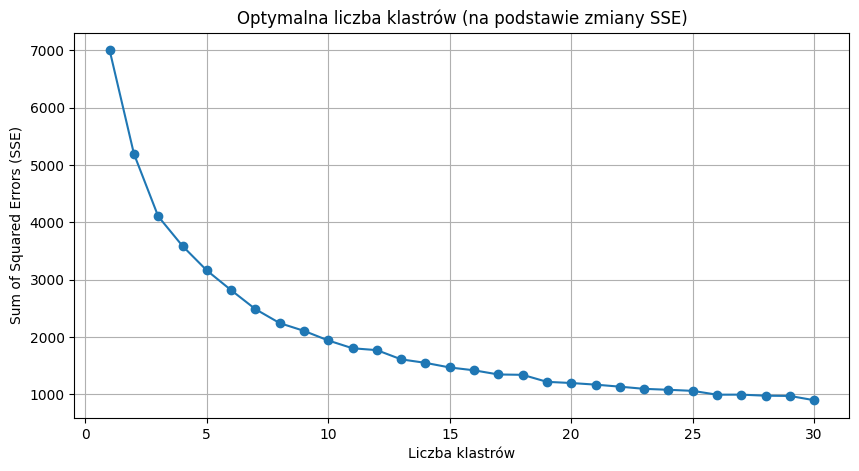

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

scaler = StandardScaler()
data_scaled_df = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:]))

sse = []

for i in range(1, 31):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), sse, marker="o")

plt.title("Optymalna liczba klastrów (na podstawie zmiany SSE)")
plt.xlabel("Liczba klastrów")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid()
plt.show()

Metoda "łokcia" sugeruje podział zbioru danych na 5-10 klastrów.

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


for k in [5, 7, 10]:
    print(f"\nK={k}")

    # KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(data_scaled_df)

    silhouette_kmeans = silhouette_score(data_scaled_df, kmeans_labels)
    db_kmeans = davies_bouldin_score(data_scaled_df, kmeans_labels)
    ch_kmeans = calinski_harabasz_score(data_scaled_df, kmeans_labels)

    print(f"KMeans:")
    print(f"Silhouette Score: {silhouette_kmeans:.4f}")
    print(f"Davies-Bouldin Index: {db_kmeans:.4f}")
    print(f"Calinski-Harabasz Score: {ch_kmeans:.4f}\n")

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(data_scaled_df)

    silhouette_agg = silhouette_score(data_scaled_df, agg_labels)
    db_agg = davies_bouldin_score(data_scaled_df, agg_labels)
    ch_agg = calinski_harabasz_score(data_scaled_df, agg_labels)

    print(f"Agglomerative Clustering:")
    print(f"Silhouette Score: {silhouette_agg:.4f}")
    print(f"Davies-Bouldin Index: {db_agg:.4f}")
    print(f"Calinski-Harabasz Score: {ch_agg:.4f}")



K=5
KMeans:
Silhouette Score: 0.2408
Davies-Bouldin Index: 1.2398
Calinski-Harabasz Score: 226.0684

Agglomerative Clustering:
Silhouette Score: 0.2269
Davies-Bouldin Index: 1.2174
Calinski-Harabasz Score: 207.4328

K=7
KMeans:
Silhouette Score: 0.2443
Davies-Bouldin Index: 1.1188
Calinski-Harabasz Score: 217.9618

Agglomerative Clustering:
Silhouette Score: 0.2401
Davies-Bouldin Index: 0.9925
Calinski-Harabasz Score: 198.9595

K=10
KMeans:
Silhouette Score: 0.2395
Davies-Bouldin Index: 1.0113
Calinski-Harabasz Score: 228.8841

Agglomerative Clustering:
Silhouette Score: 0.1848
Davies-Bouldin Index: 1.1320
Calinski-Harabasz Score: 195.1228


## Wnioski:
* Metryka Silhouette Score:

    * Najwyższą wartość Silhouette Score osiągnięto przy KMeans dla k=7 (0.2443)

    *  Wartości Silhouette są niskie, co może sugerować, że klastry nie są bardzo wyraźnie odseparowane, struktura danych może być rozproszona bez wyraźnych, dobrze rozdzielonych grup

* Metryka Davies-Bouldin Index (DBI):

    * Najniższą wartość DBI (lepsza jakość klastrowania) Agglomerative Clustering osiągnęło dla k=7 (0.9925).

    * Ogólnie wartości DBI są w okolicy 1.0-1.2, co wskazuje na średnią jakość klasteryzacji, klastry nie są idealnie rozdzielone mogą się na siebie nakładać

* Metryka Calinski-Harabasz Index (CHI):

    * Najwyższą wartość CHS (lepiej, gdy metryka większa) osiągnięto przy KMeans dla k=10 (228.88)

    * Wysoka wartość CHS dla k=10 oznacza, że klastry są stosunkowo zwarto rozmieszczone w obrębie swoich grup i dobrze od siebie oddzielone
* Danie nie tworzą wyraźnych klastrów, więc ciężko o dobre wyniki

In [8]:
# DBSCAN
for eps in [0.3, 0.5, 0.7]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(data_scaled_df)

    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    print(f"DBSCAN z eps={eps}:")
    print(f"Liczba klastrów: {n_clusters}")
    print(f"Liczba szumów: {n_noise}")

    if n_clusters > 1:
        silhouette_dbscan = silhouette_score(data_scaled_df, dbscan_labels)
        db_dbscan = davies_bouldin_score(data_scaled_df, dbscan_labels)
        ch_dbscan = calinski_harabasz_score(data_scaled_df, dbscan_labels)

        print(f"Silhouette Score: {silhouette_dbscan:.4f}")
        print(f"Davies-Bouldin Index: {db_dbscan:.4f}")
        print(f"Calinski-Harabasz Score: {ch_dbscan:.4f}")


DBSCAN z eps=0.3:
Liczba klastrów: 3
Liczba szumów: 764
Silhouette Score: -0.1915
Davies-Bouldin Index: 1.1282
Calinski-Harabasz Score: 5.3150
DBSCAN z eps=0.5:
Liczba klastrów: 12
Liczba szumów: 514
Silhouette Score: -0.2831
Davies-Bouldin Index: 1.9936
Calinski-Harabasz Score: 13.5102
DBSCAN z eps=0.7:
Liczba klastrów: 6
Liczba szumów: 287
Silhouette Score: -0.1670
Davies-Bouldin Index: 1.9369
Calinski-Harabasz Score: 15.5625


## Wnioski:
  * Niezależnie od wartości eps, duża część danych została oznaczona jako szum
  * Większość danych nie tworzy gęstych skupisk
  * Dane są rozproszone i niejednolite, co utrudnia ich grupowanie na podstawie gęstości lokalnej
  * W każdym przypadku Silhouette Score jest ujemny, co sugeruje bardzo słabą jakość klastryzacji
  * DBI dla eps=0.3 wynosi 1.1282, co jest najlepszym wynikiem, ale nadal nie jest bardzo dobry
  * Bardzo niskie wartości CHI (od 5.3 do 15.6) potwierdzają, że klastry są słabo oddzielone i rozproszone
  * DBSCAN nie nadaje się dobrze do klasteryzacji tego zbioru danych

# Zadanie 3
Z użyciem algorytmu fuzzy clustering proszę zaproponować model dla podanego powyżej zestawu danych. Do uczenia należy wybrać wyłącznie połowę jego kolumn.

In [9]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.6 MB/s eta 0:00:00


In [10]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("planets.csv")
data = data.dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])

cols = data_scaled.shape[1] // 2
df_half = data_scaled[:, :cols]

cntr, u_orig, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_half.T, c=3, m=2, error=0.005, maxiter=1000)

cluster_membership = np.argmax(u_orig, axis=0)

data["cluster"] = cluster_membership

# Fuzzy Partition Coefficient (fpc) - im bliżej 1 tym lepiej
print("Fuzzy C-Means FPC:", fpc)

numeric_cols = data.select_dtypes(include=[np.number]).columns
print("\nŚrednie wartości cech w klastrach:")
print(data.groupby("cluster")[numeric_cols].mean())


Fuzzy C-Means FPC: 0.8044480918077751

Średnie wartości cech w klastrach:
          pl_orbper  pl_orbsmax    pl_rade     pl_masse  pl_orbeccen  \
cluster                                                                
0        137.693864    0.260993  13.131811  2814.098066     0.196382   
1          7.079236    0.062095  14.032827   382.199098     0.073902   
2         23.590078    0.112332   3.078908    24.305628     0.084489   

              pl_eqt      st_teff   st_mass     sy_dist  cluster  
cluster                                                           
0        1395.270270  6135.648649  1.255135  523.958432      0.0  
1        1457.794311  5795.814726  1.126740  435.755545      1.0  
2         862.200704  4840.517958  0.780106  152.933941      2.0  


## Wnioski:
  * Wynik FPC jest wysoki, na poziomie 0.8 (metryka przyjmuje wartości w przedziale 0-1), co oznacza że klastryzacja jest dobrej jakości
  * Algorytm wykrył trzy sensowne grupy planet
  * Modele rozmyte dobrze oddają fakt, że niektóre planety mogą mieć cechy pośrednie między różnymi grupami

# Zadanie 4
Dla zbioru danych circle.csv proszę, wykorzystując wszystkie (za wyjątkiem c-means) poznane do tej pory algorytmy klasteryzacyjne, podjąć kilka prób dopasowania jak najlepszego modelu, za każdym razem oceniając rozwiązanie z użyciem dedykowanych do tego metryk. Który z algorytmów najlepiej radzi sobie z takim układem danych i dlaczego? Proszę przedstawić wyniki również w formie odpowiednich wizualizacji.

         x1        x2
0  0.432626 -0.298688
1  0.461803  0.221889
2 -0.716376 -0.792817
3 -0.459221  0.883365
4  0.506906 -0.206999


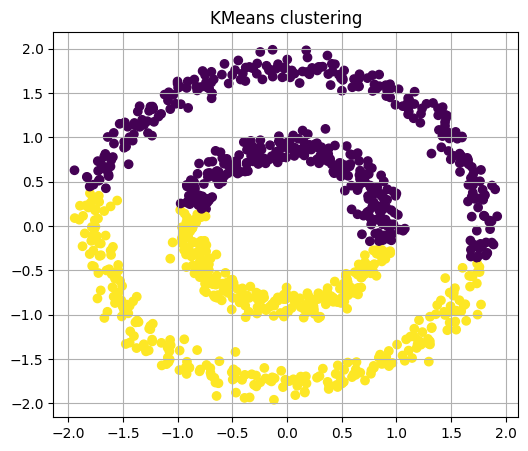

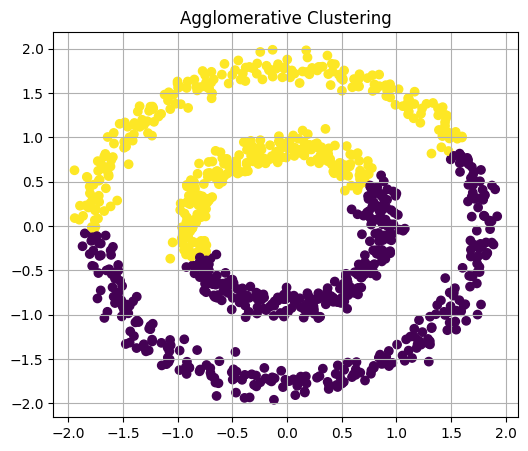

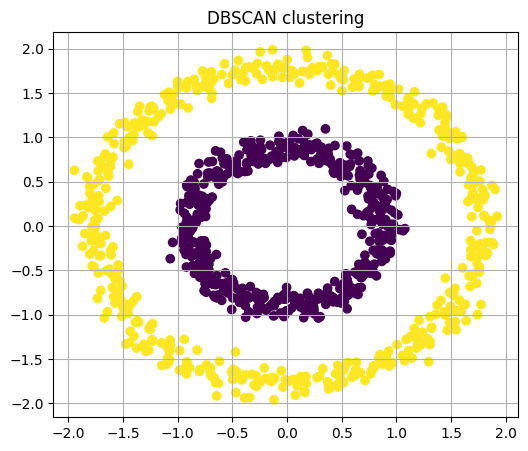


Wyniki oceny modeli:
                   Algorytm  Silhouette Score  Davies-Bouldin Index  \
0                    KMeans          0.352152              1.189058   
1  Agglomerative Clustering          0.338058              1.217078   
2                    DBSCAN          0.113872            170.760374   

   Calinski-Harabasz Index  
0               571.631774  
1               532.609314  
2                 0.030709  


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("circle.csv")
print(data.head())

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

results = []

def evaluate_model(labels, name):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data_scaled, labels)
        db = davies_bouldin_score(data_scaled, labels)
        ch = calinski_harabasz_score(data_scaled, labels)
    else:
        silhouette, db, ch = np.nan, np.nan, np.nan
    results.append({
        "Algorytm": name,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db,
        "Calinski-Harabasz Index": ch
    })

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
evaluate_model(kmeans_labels, "KMeans")

# wizualizacja KMeans
plt.figure(figsize=(6,5))
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=kmeans_labels, cmap="viridis")
plt.title("KMeans clustering")
plt.grid()
plt.show()


# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(data_scaled)
evaluate_model(agg_labels, "Agglomerative Clustering")

# wizualizacja Agglomerative CLustering
plt.figure(figsize=(6,5))
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=agg_labels, cmap="viridis")
plt.title('Agglomerative Clustering')
plt.grid()
plt.show()


# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
evaluate_model(dbscan_labels, "DBSCAN")

# wizualizacja DBSCAN
plt.figure(figsize=(6,5))
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=dbscan_labels, cmap="viridis")
plt.title("DBSCAN clustering")
plt.grid()
plt.show()


results_df = pd.DataFrame(results)
print("\nWyniki oceny modeli:")
print(results_df)


## Wnioski:
  *  Biorąc pod uwagę metryki Silhouette Score, BDI i CHI, najlepiej z problemem klastryzacji poradził sobie algorytm KMeans
  *  Warto jednak zwrócić uwagę, że w zależności od tego, jaki problem staramy się rozwiązać, bardziej optymalnym rozwiązaniem może okazać się rozwiązanie przez algorytm DBSCAN
  * Na wizualizacji wyników widać, że algorytm DBSCAN jako jedyny podzielił zbiór na dwa okręgi
  * Dzięki podejściu gęstościowemu umie rozpoznawać klastry o niestandardowym kształcie (nie tylko "okrągłe" lub "eliptyczne" jakie zakładają KMeans czy Agglomerative Clusetering)